Write a colab to demonstrate various dimensionality reduction techniques discussed in the class using 

b) any tabular data set (i gave example of iris data set in slides with colab links)

You need to showcase 

i) PCA

ii) SVD

iii) LLE

iv) t-SNE

v) ISOMAP

vi) UMAP

**Principal Component Analysis**

I am using Scikit-Learn to implement PCA using the Mushrool classification Dataset available at https://www.kaggle.com/uciml/mushroom-classification/

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Import the required modules

In [14]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

Load the mushroom dataset

In [3]:
m_data = pd.read_csv('/content/gdrive/MyDrive/msse/fall-21/data-mining/mushrooms.csv')
m_data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


Check the shape and if there are any null values.

In [9]:
m_data.shape

(8124, 23)

In [10]:
m_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Since there are no null values no imputation is required.

Encode the data with LabelEncoder

In [4]:
# Machine learning systems work with integers, we need to encode these
# string characters into ints

encoder = LabelEncoder()

# Now apply the transformation to all the columns:
for col in m_data.columns:
    m_data[col] = encoder.fit_transform(m_data[col])

X_features = m_data.iloc[:,1:23]
y_label = m_data.iloc[:, 0]

Scale the features with a Standard Scaler

In [5]:
# Scale the features
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

Using PCA, get the list of features and plot them that the most variance.

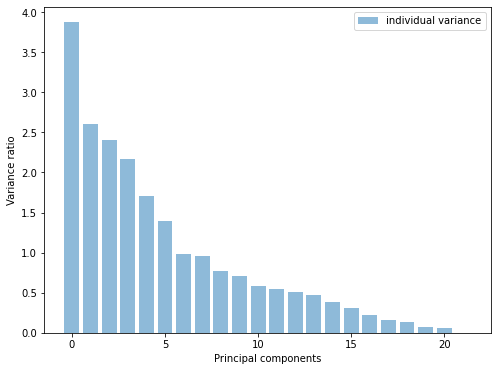

In [6]:
# Visualize
pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(22), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

Get the top 17 features and plot them using a scatter plot

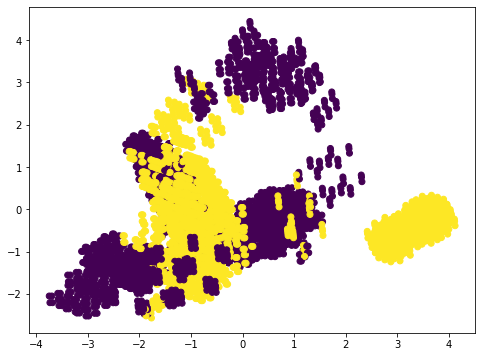

In [7]:
pca2 = PCA(n_components=17)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,5], c=m_data['class'])
plt.show()

Plot the top 3 features and we can visualize how the classification changes

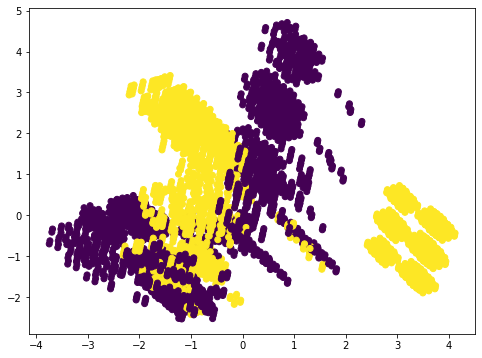

In [8]:
pca3 = PCA(n_components=3)
pca3.fit(X_features)
x_3d = pca3.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,1], c=m_data['class'])
plt.show()

**Singular Value Decomposition**

SVD is a method of representing a matrix as a series of linear approximations that expose the underlying meaning-structure of the matrix.

In [12]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5)
svd.fit(X_features)
svd.transform(X_features)

array([[-0.5743218 , -0.97578095, -1.2217599 ,  0.18548477, -1.4520053 ],
       [-2.28210219,  0.27906706, -1.20049463,  0.27203744, -1.50161253],
       [-1.85803554, -0.2709718 , -1.3723691 ,  1.05594827, -1.81037974],
       ...,
       [-1.6215162 , -0.75753591,  2.73358221,  6.45360525,  2.47812059],
       [ 3.67060563, -1.03277432,  0.16845993, -0.14653793, -0.15398454],
       [-1.57520266, -1.22858091,  2.44722906,  6.53961489,  2.72232374]])

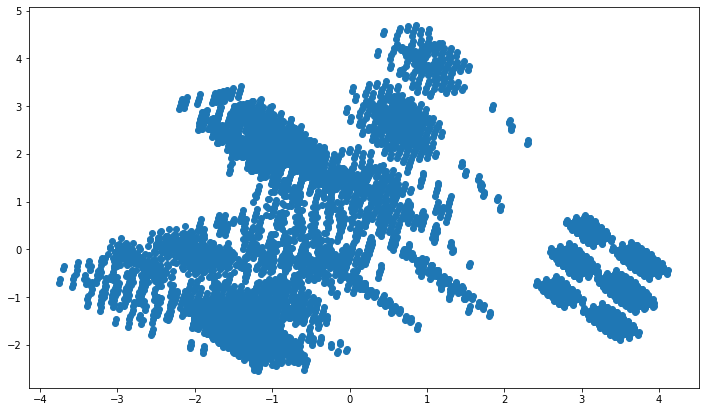

In [15]:
X_svd = TruncatedSVD(n_components=2, n_iter=5, algorithm='randomized').fit_transform(X_features)

plt.figure(figsize=(12,7))

plt.scatter(X_svd[:, 0], X_svd[:, 1], cmap= mpl.cm.get_cmap("Paired"))
plt.show()

We can see that the SVD visualization looks similar to PCA. In fact SVD and PCA are closely related.

**Locally Linear Embedding**

The LLE algorithm is a non-linear dimension-reducing technique, widely used due to its computational simplicity and intuitive approach. LLE first linearly reconstructs each input point from its nearest neighbors and then preserves these neighborhood relations in the low-dimensional embedding.

In [20]:
from sklearn.manifold import LocallyLinearEmbedding

X_reduced_lle = LocallyLinearEmbedding(random_state=7, eigen_solver='dense').fit_transform(X_features)

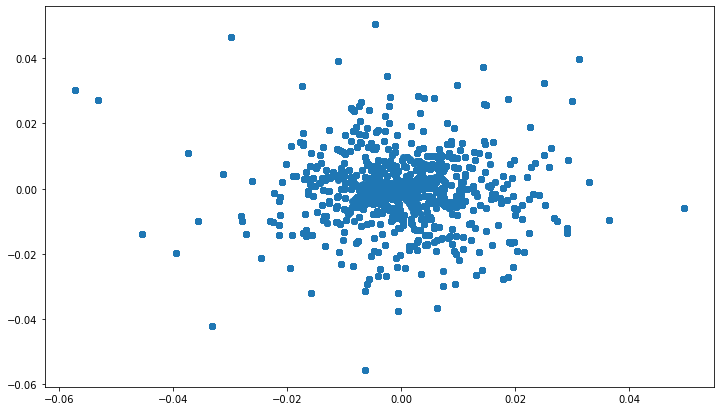

In [21]:
plt.figure(figsize=(12,7))

plt.scatter(X_reduced_lle[:, 0], X_reduced_lle[:, 1], cmap= mpl.cm.get_cmap("Paired"))
plt.show()

**t-SNE**

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_reduced_tsne = tsne.fit_transform(X_features)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8124 samples in 0.001s...
[t-SNE] Computed neighbors for 8124 samples in 1.463s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8124
[t-SNE] Computed conditional probabilities for sample 2000 / 8124
[t-SNE] Computed conditional probabilities for sample 3000 / 8124
[t-SNE] Computed conditional probabilities for sample 4000 / 8124
[t-SNE] Computed conditional probabilities for sample 5000 / 8124
[t-SNE] Computed conditional probabilities for sample 6000 / 8124
[t-SNE] Computed conditional probabilities for sample 7000 / 8124
[t-SNE] Computed conditional probabilities for sample 8000 / 8124
[t-SNE] Computed conditional probabilities for sample 8124 / 8124
[t-SNE] Mean sigma: 0.779109
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.781525
[t-SNE] KL divergence after 300 iterations: 1.694729


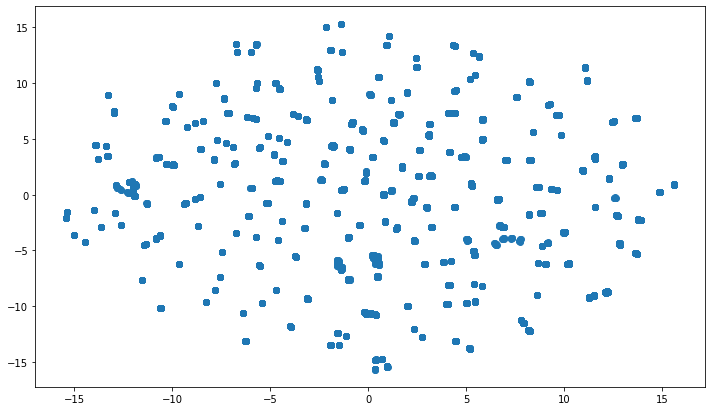

In [23]:
plt.figure(figsize=(12,7))

plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], cmap= mpl.cm.get_cmap("Paired"))
plt.show()

**ISOMAP**

Isomap is a nonlinear dimensionality reduction method used for computing a quasi-isometric, low-dimensional embedding of a set of high-dimensional data points.

In [24]:
from sklearn.manifold import Isomap

X_reduced_isomap = Isomap(n_components=2, n_neighbors=10, n_jobs=-1).fit_transform(X_features)

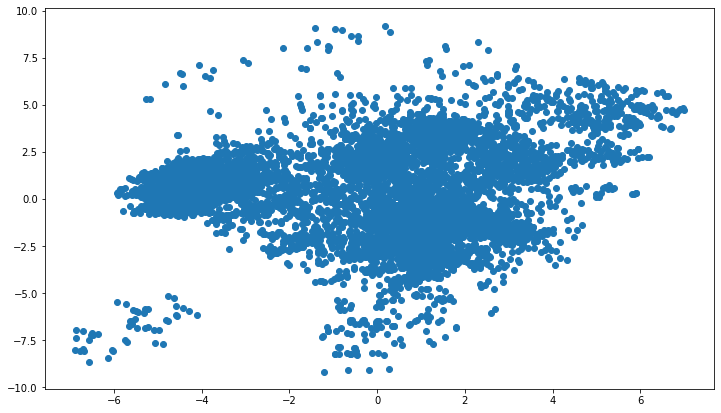

In [25]:
plt.figure(figsize=(12,7))

plt.scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1], cmap= mpl.cm.get_cmap("Paired"))
plt.show()

**UMAP**

UMAP is an algorithm for dimension reduction based on manifold learning techniques and ideas from topological data analysis. It provides a very general framework for approaching manifold learning and dimension reduction, but can also provide specific concrete realizations.

In [26]:
!pip install umap-learn
import umap

     |████████████████████████████████| 86 kB 3.6 MB/s 
     |████████████████████████████████| 1.1 MB 19.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=51bce3e00a622d2e8ac659bf78e2ecca5a827f251466dc7f43b3456b472baf4b
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=31a058bd4ec24a8e246582d01f19f4980971670dec2e5d21737cf4e8159486bd
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [27]:
X_reduced_umap = umap.UMAP(n_neighbors=5).fit_transform(X_features)

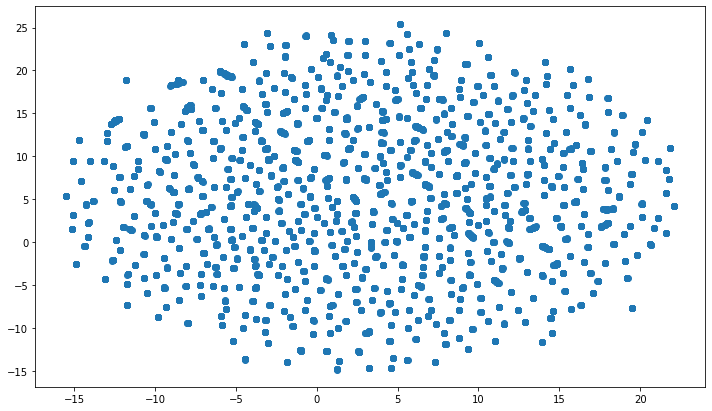

In [28]:
plt.figure(figsize=(12,7))

plt.scatter(X_reduced_umap[:, 0], X_reduced_umap[:, 1], cmap= mpl.cm.get_cmap("Paired"))
plt.show()